# __Challenge TelecomX ML__

## Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jbernalg/challenge_TelecomX/refs/heads/main/data_out/datos_tratados.csv', sep=',')
data.head()

,cancelacion,genero,jubilado,en_pareja,dependientes,meses_contrato,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,...,proteccion_dispositivo,soporte_efectivo,streaming_TV,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cuenta_mensual,cuentas_total,cuentas_diarias
0,0,Femenino,No,Si,Si,9,Si,No,DSL,No,...,No,Si,Si,No,un year,Si,cheque por correo,65.6,593.30,0.242963
1,0,Masculino,No,No,No,9,Si,Si,DSL,No,...,No,No,No,Si,mes a mes,No,cheque por correo,59.9,542.40,0.221852
2,1,Masculino,No,No,No,4,Si,No,Fibra_optica,No,...,Si,No,No,No,mes a mes,Si,cheque electronico,73.9,280.85,0.615833
3,1,Masculino,Si,Si,No,13,Si,No,Fibra_optica,No,...,Si,No,Si,Si,mes a mes,Si,cheque electronico,98.0,1237.85,0.251282
4,1,Femenino,Si,Si,No,3,Si,No,Fibra_optica,No,...,No,Si,Si,No,mes a mes,Si,cheque por correo,83.9,267.40,0.932222


## Encoding

In [3]:
# seleccionar variables categoricas
columns_cat = data.select_dtypes(include='object').columns
print(columns_cat)

Index(['genero', 'jubilado', 'en_pareja', 'dependientes',
       'servicio_telefonico', 'multiples_lineas', 'servicio_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_efectivo', 'streaming_TV', 'streaming_peliculas',
       'tipo_contrato', 'facturacion_electronica', 'metodo_pago'],
      dtype='object')


In [4]:
# aplicamos get_dummies para llevar variables categoricas a numericas
df = pd.get_dummies(data, drop_first=True)
df.sample(5)

,cancelacion,meses_contrato,cuenta_mensual,cuentas_total,cuentas_diarias,genero_Masculino,jubilado_Si,en_pareja_Si,dependientes_Si,servicio_telefonico_Si,...,proteccion_dispositivo_Si,soporte_efectivo_Si,streaming_TV_Si,streaming_peliculas_Si,tipo_contrato_mes a mes,tipo_contrato_un year,facturacion_electronica_Si,metodo_pago_cheque por correo,metodo_pago_tarjeta de credito,metodo_pago_transferencia
2876,0,67,59.55,4103.90,0.029627,False,False,True,True,False,...,True,True,True,True,False,False,True,False,False,False
6328,1,4,56.50,235.10,0.470833,False,False,True,True,True,...,False,True,False,False,True,False,False,True,False,False
4297,0,52,49.75,2535.55,0.031891,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True
6990,0,60,97.20,5611.75,0.054000,False,False,True,False,True,...,False,True,True,True,False,False,True,False,False,False
4503,0,42,108.30,4586.15,0.085952,True,False,True,False,True,...,True,True,True,True,False,True,True,False,False,False


> El dataframe pasa de 21 a 26 variables debido al uso del metodo get_dummies.

> El metodo get_dummies identifica si los valores de las variables son datos unicos y de ser asi los convierte en una nueva columna.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   cancelacion                              7032 non-null   int64  
 1   meses_contrato                           7032 non-null   int64  
 2   cuenta_mensual                           7032 non-null   float64
 3   cuentas_total                            7032 non-null   float64
 4   cuentas_diarias                          7032 non-null   float64
 5   genero_Masculino                         7032 non-null   bool   
 6   jubilado_Si                              7032 non-null   bool   
 7   en_pareja_Si                             7032 non-null   bool   
 8   dependientes_Si                          7032 non-null   bool   
 9   servicio_telefonico_Si                   7032 non-null   bool   
 10  multiples_lineas_Si                      7032 no

## Analisis de valores faltantes

In [6]:
df.isnull().sum()

cancelacion                                0
meses_contrato                             0
cuenta_mensual                             0
cuentas_total                              0
cuentas_diarias                            0
genero_Masculino                           0
jubilado_Si                                0
en_pareja_Si                               0
dependientes_Si                            0
servicio_telefonico_Si                     0
multiples_lineas_Si                        0
multiples_lineas_sin servicio teleonico    0
servicio_internet_Fibra_optica             0
servicio_internet_No                       0
seguridad_online_Si                        0
respaldo_online_Si                         0
proteccion_dispositivo_Si                  0
soporte_efectivo_Si                        0
streaming_TV_Si                            0
streaming_peliculas_Si                     0
tipo_contrato_mes a mes                    0
tipo_contrato_un year                      0
facturacio

> Variables sin valores faltantes.

## Correlacion entre las variables

In [7]:
corr = df.corr()

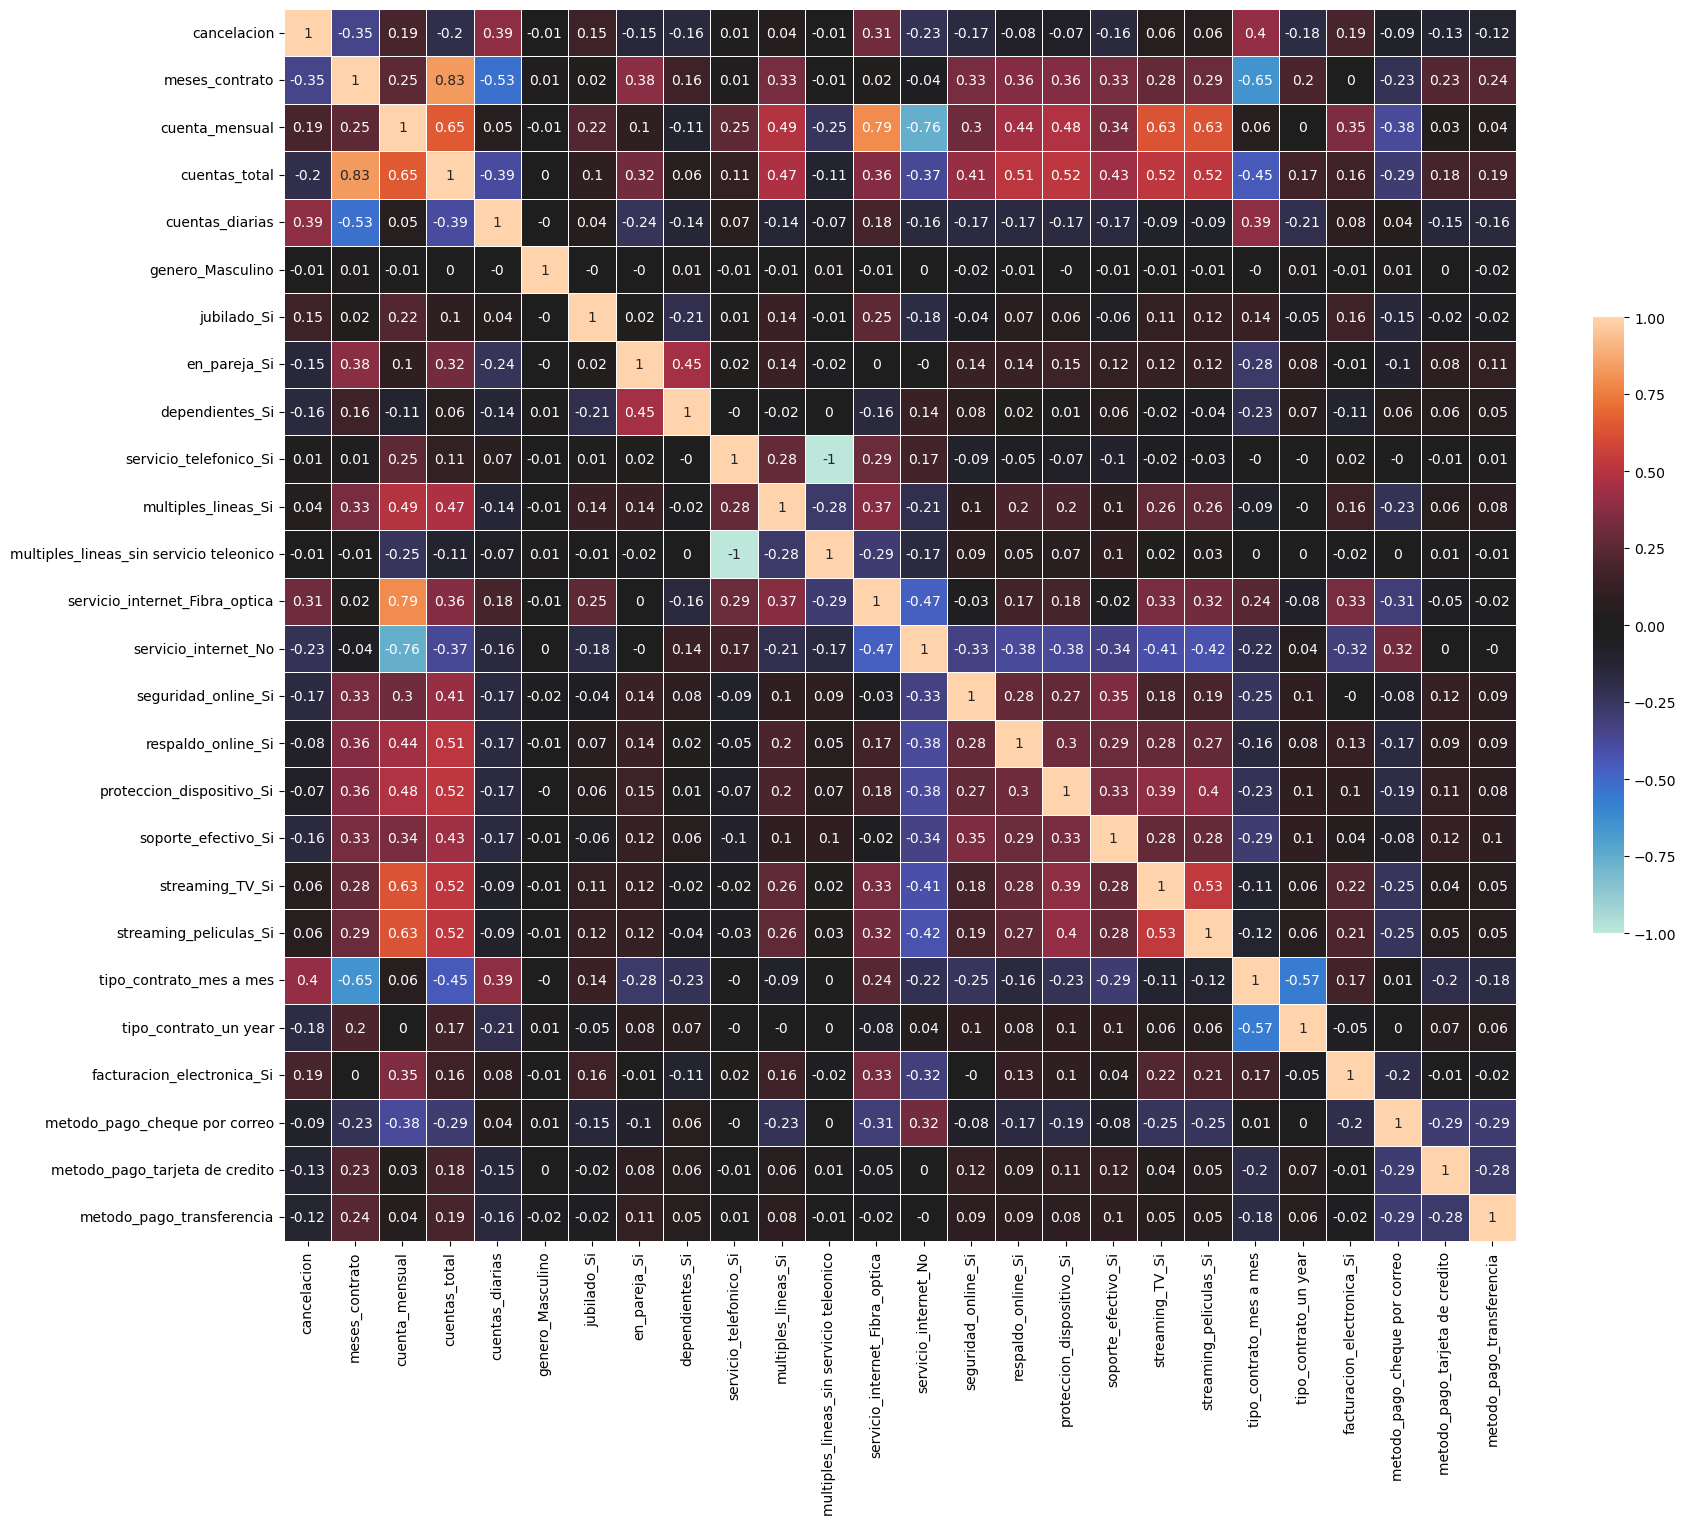

In [8]:
# grafico de mapa de calor
import numpy as np

fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
                 square=True, linewidths=0.5, annot=True, cbar_kws={'shrink': 0.5})

plt.show()

Vamos a crear un filtro para obtener las correlaciones mayores a 0.07 con respecto a la variable objetivo.

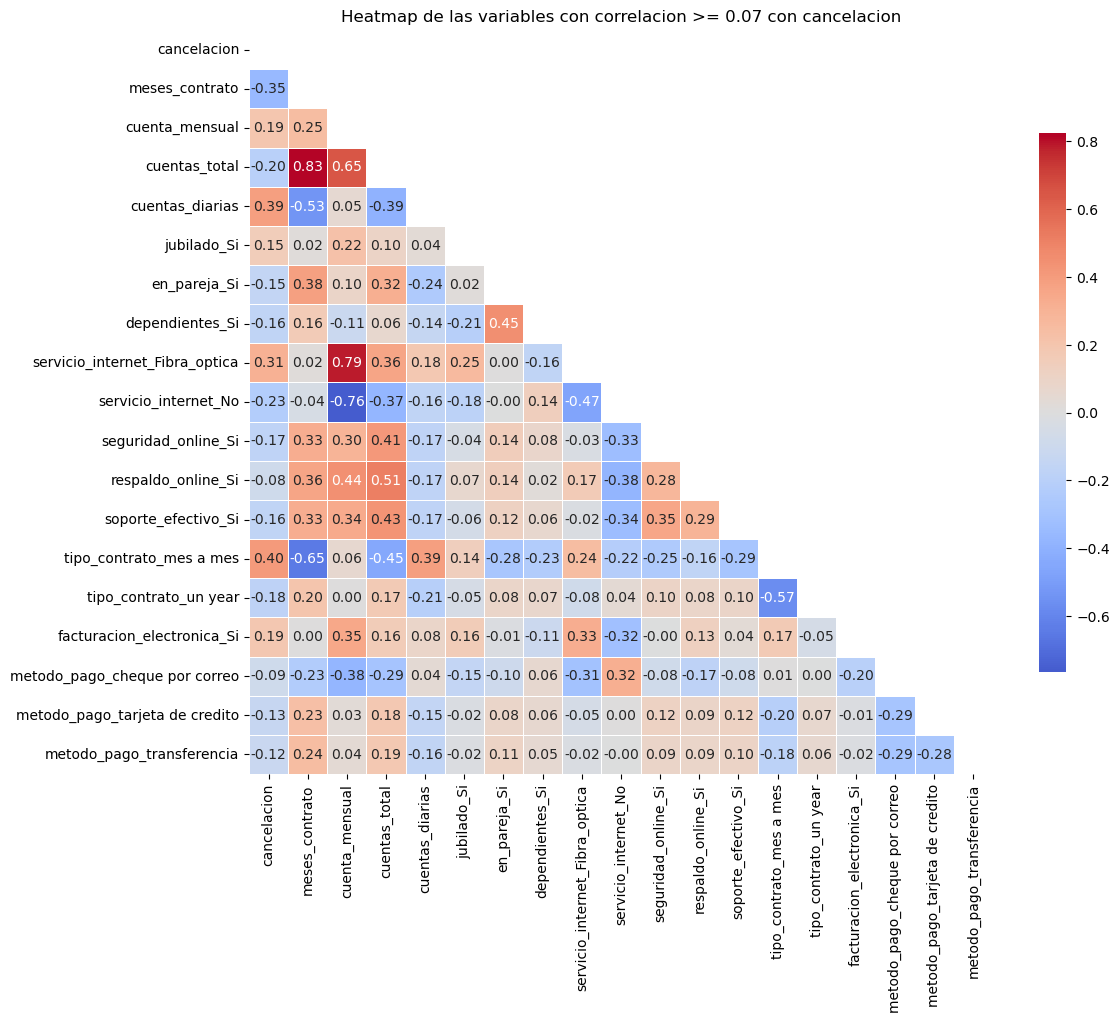

In [9]:
# definir variable objetivo
target = 'cancelacion'

# definir la minima correlacion absoluta
limit = 0.07

# filtrar variables con correlacion absoluta > limit
vars_relevantes = corr.index[abs(corr[target]) >= limit].tolist()

# garantizar que la variable objetivo se encuentre en la lista
if target not in vars_relevantes:
    vars_relevantes.append(target)

# crear matriz de correlacion con solo las variables seleccionadas
corr_filtrada = corr.loc[vars_relevantes, vars_relevantes]

# generar una mascara para omitir el triangulo superior de la matriz
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# grafico de mapa de calor
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.7},
    mask=mascara
)

plt.title(f'Heatmap de las variables con correlacion >= {limit} con {target}')
plt.show()

> Se obtiene una cantidad de variables considerables que podria ayudarnos a predecir la variable objetivo.

> Variables como _cuenta_mensual_, _cunetas diarias_, _fibra_optica_, _tipo_contrato_mes_a_mes_ y _facturacion_electronica_ estan correlacionados de forma positiva con _cancelacion_

> Variables como _cuenta_total_, _meses_contrato_, _en_pareja_, _dependiente_si_ estan correlacionadas de forma negativa con _cancelacion_

> Si ampliamos el valor de filtro, podriamos obtener menos cantidades de variables predictoras lo cual podria ser un problema a la hora de entrenar el modelo. Es importante recordar que la correlacion no implica causalidad! Esto sugiere que el analisis de correlacion determina una relacion lineal entre las variables predictoras y la variable objetivo pero no considera otras posibles relaciones. Dicho esto, es importante considerar un filtro de bajo valor.

> El analisis de correlacion es una etapa de exploracion, no una etapa de seleccion de variables.

## Analisis de Multicolinealidad

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [11]:
# seleccionamos las variables predictoras
X = df.drop(columns=['cancelacion'])

# agregamos la constante a las variables predictoras
X_const = add_constant(X)

# convertimos las constantes de tipo float
X_const = X_const.astype(float)

In [12]:
# nuevo dataframe
vif_data = pd.DataFrame()
# agregamos las columnas de X_const
vif_data['feature'] = X_const.columns
# calculo de VIF para cada feature
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

/home/jbernal/anaconda3/envs/data_env/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/jbernal/anaconda3/envs/data_env/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,servicio_telefonico_Si,inf
11,multiples_lineas_sin servicio teleonico,inf
2,cuenta_mensual,866.664373
12,servicio_internet_Fibra_optica,148.514245
13,servicio_internet_No,104.223844
19,streaming_peliculas_Si,24.173355
18,streaming_TV_Si,24.095609
3,cuentas_total,10.876927
1,meses_contrato,7.845449
10,multiples_lineas_Si,7.306860


> Variables con VIF menores a 5 tienen baja multicolinealidad.

> Variables con valores de VIF entre 5 y 10 tiene multicolinealidad moderada.

> Variables con VIF mayores a 10 presentan alta multicolinealidad.

> Las variables _servicio_telefonico_si_ y _multiples_lineas_sin_servicio teleonico_ presentan multicolinealidad perfecta por lo que debemos omitirlas de las variables predictoras.

In [13]:
import statsmodels.api as sum

# Copia del X_const original
X_filtered = X_const.copy()

# removemos las variables con multicolinealidad perfecta
var_to_drop = [
    'servicio_telefonico_Si',
    'multiples_lineas_sin servicio teleonico'
]

X_filtered.drop(columns=var_to_drop, inplace=True)

# garantizamos que los datos esten en formato float para que al calcular VIF funcione
X_filtered = X_filtered.astype(float)

# Calculamos nuevamente VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_filtered.columns
vif_data['VIF'] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
0,const,101.013546
2,cuenta_mensual,35.781364
3,cuentas_total,10.876395
10,servicio_internet_Fibra_optica,10.121354
1,meses_contrato,7.845236
11,servicio_internet_No,4.863430
18,tipo_contrato_mes a mes,3.691528
16,streaming_TV_Si,2.466810
17,streaming_peliculas_Si,2.447248
9,multiples_lineas_Si,1.944381


> Las variables _cuenta_mensual_ y _cuentas_total_ tienen una alta multicolinealidad. Esto se debe a que la cuenta mensual es la division entre la cuenta total y los meses de contrato. Eliminamos _cuentas_total_ de las variables predictoras

In [14]:
# eliminar variable con alta multicolinealidad
X_filtered.drop(columns=['cuentas_total'], inplace=True)

Calculamos nuevamente el VIF para todas las variables predictoras seleccionadas

In [16]:
# Calculamos nuevamente VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_filtered.columns
vif_data['VIF'] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
0,const,88.191919
2,cuenta_mensual,33.847164
9,servicio_internet_Fibra_optica,10.116779
10,servicio_internet_No,4.821354
17,tipo_contrato_mes a mes,3.672786
1,meses_contrato,3.287119
15,streaming_TV_Si,2.459081
16,streaming_peliculas_Si,2.437959
8,multiples_lineas_Si,1.940663
18,tipo_contrato_un year,1.755199


> A pesar que _cuenta_mensual_ tiene un alto VIF lo conservamos para quedarnos con una referencia del cargo por cliente. No influye sobre la efectividad del modelo debido a que es la unica relacionada con el cargo del cliente.

## Modelos Predictivos

Vamos a utilizar un modelo de regresion logistica y un Random Forest. Para ello, debemos normalizar los datos

## Proporcion de la variable objetivo

In [ ]:
df['cancelacion'].value_counts(normalize=True)

cancelacion
0    0.734215
1    0.265785
Name: proportion, dtype: float64

> En teoria la proporcion minima de la clase minoritaria es de 40%. Para este caso, vemos que la proporcion de la clase minoritaria es del 26% lo que indica un gran desbalance entre las clases que podria sesgar el modelo al entrenarlo.

## Balanceo de las clases

Vamos a utilizar el metodo SMOTE el cual consiste en sintetizar nueva informacion a partir de la informacion existente. Tales datos sinteticos son relativamente cercanos a los datos reales, pero no son identicos

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('cancelacion', axis=1)
y = df['cancelacion']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
# mostrar dimension de las variables
print(X_res.shape)
print(y_res.shape)

(10326, 25)
(10326,)


> Las clases quedan balanceadas, con la misma cantidad de registros.